In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("E:/higgs-boson-detection/data/stratified_dataset_cleaned.csv")

In [3]:
df

,Label,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1_pt,jet1_eta,jet1_phi,jet1_btag,...,jet4_eta,jet4_phi,jet4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,0.0,1.414111,0.777173,1.476348,0.941705,0.393734,0.450708,-1.650739,-0.478922,0.000000,...,0.227733,0.349433,0.000000,1.081373,0.806024,1.323204,0.642114,0.321394,0.716233,0.822963
1,0.0,0.375535,-0.488012,-0.306524,2.146495,-1.470270,1.090034,0.810973,0.940936,0.000000,...,0.317678,0.512577,0.000000,0.849610,0.957074,1.077445,0.650459,0.612124,0.722173,0.930153
2,1.0,0.797188,-1.243812,-0.093458,0.420826,0.705924,3.442966,-0.180247,-0.414061,0.000000,...,-0.549291,-1.505743,3.101961,1.217790,1.202432,0.992408,1.428739,1.387246,1.570939,1.344364
3,1.0,1.041139,1.108322,0.409349,0.695499,1.597762,0.651052,0.904054,-0.304849,0.000000,...,0.358486,1.413754,3.101961,0.860930,1.103723,1.034815,0.782009,0.841010,0.946560,0.811775
4,1.0,0.763331,-0.044857,-0.797579,1.318546,0.500634,0.871643,0.829787,-1.093173,2.173076,...,1.985823,1.459812,0.000000,3.396675,2.170314,1.279922,1.146831,1.076243,1.469676,1.228075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,0.0,0.332894,-2.198302,1.014148,0.540912,1.527387,0.962975,-0.815975,-0.388004,2.173076,...,-0.588434,0.946519,0.000000,0.853765,0.643871,0.981349,0.959769,1.584341,0.983109,0.888162
29995,0.0,1.927818,0.049618,1.004716,0.936798,1.363100,1.181642,1.033775,-0.177342,0.000000,...,0.565026,-1.147270,3.101961,0.837023,0.999264,1.006415,0.952120,0.579946,0.921034,1.067014
29996,1.0,1.494818,-1.022721,-0.393083,0.877291,-1.249811,0.413149,0.115831,-1.492877,1.086538,...,-0.415207,-0.217790,0.000000,0.870498,0.809340,1.105573,1.468559,1.129329,1.041022,0.870760
29997,0.0,0.535302,-0.330230,1.119017,0.791858,-0.356288,0.564484,-1.618061,-1.484007,0.000000,...,-1.708581,1.058611,0.000000,0.791052,0.945176,0.984624,0.707994,1.111592,0.769067,0.683744


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Label                     29999 non-null  float64
 1   lepton_pT                 29999 non-null  float64
 2   lepton_eta                29999 non-null  float64
 3   lepton_phi                29999 non-null  float64
 4   missing_energy_magnitude  29999 non-null  float64
 5   missing_energy_phi        29999 non-null  float64
 6   jet1_pt                   29999 non-null  float64
 7   jet1_eta                  29999 non-null  float64
 8   jet1_phi                  29999 non-null  float64
 9   jet1_btag                 29999 non-null  float64
 10  jet2_pt                   29999 non-null  float64
 11  jet2_eta                  29999 non-null  float64
 12  jet2_phi                  29999 non-null  float64
 13  jet2_btag                 29999 non-null  float64
 14  jet3_p

In [5]:
X = df.drop(columns=['Label'])  # Drop the label column
y = df['Label']  # The target column is 'Label'



In [6]:
# Step 4: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [8]:
rf = RandomForestClassifier(n_estimators=5, random_state=42, max_depth=3)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=3, n_estimators=5, random_state=42)

In [10]:
import joblib
joblib.dump(rf, 'E:/higgs-boson-detection/data/tree_basic.pkl')

['E:/higgs-boson-detection/data/tree_basic.pkl']

In [9]:
y_pred = rf.predict(X_test_scaled)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.6226


In [11]:
features = X.columns.to_list()

label_names = ["Background", "Signal"]

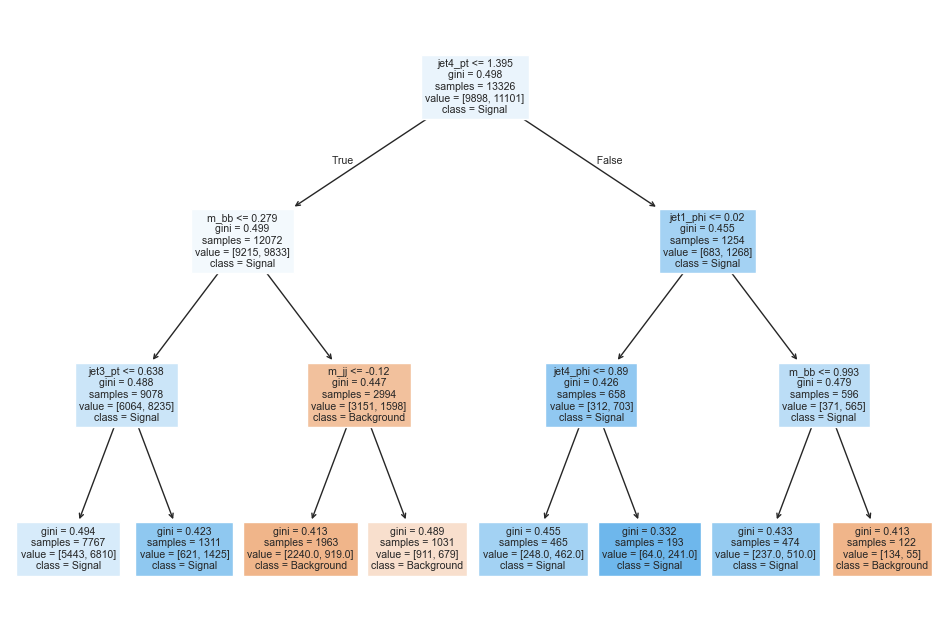

In [19]:
from sklearn.tree import plot_tree
individual_tree = rf.estimators_[0]  # Get the first tree (you can choose any index)

# Visualize the decision tree using Matplotlib's plot_tree method
plt.figure(figsize=(12, 8))
plot_tree(individual_tree, feature_names=features, class_names=label_names, filled=True)
plt.savefig("decision_tree_plot.png", dpi=300, bbox_inches='tight')
plt.show()